Importing the Dependencies

In [42]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [43]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [44]:
# printing the first 5 rows of the dataset
diabetes_dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
487,0,173,78,32,265,46.5,1.159,58,0
526,1,97,64,19,82,18.2,0.299,21,0
331,2,87,58,16,52,32.7,0.166,25,0
120,0,162,76,56,100,53.2,0.759,25,1
72,13,126,90,0,0,43.4,0.583,42,1


In [45]:
# number of rows and Columns in this dataset
print(diabetes_dataset.shape)

# getting the statistical measures of the data
diabetes_dataset.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
diabetes_dataset.duplicated().sum()

0

In [48]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic <br>
1 --> Diabetic <br>
unbalanced data

In [49]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


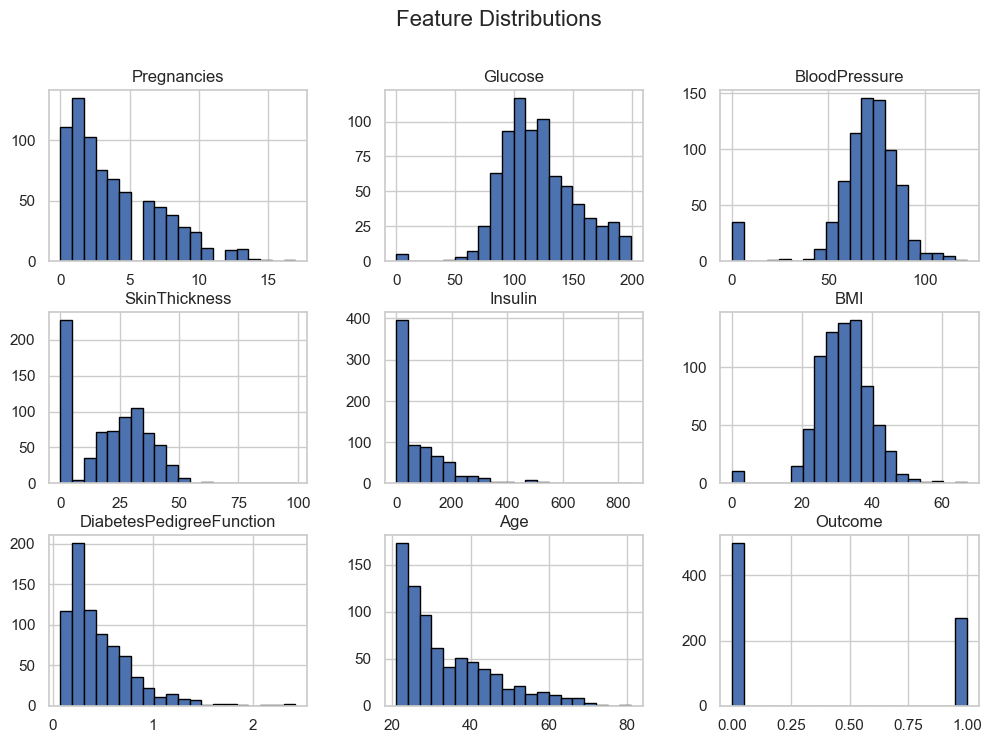

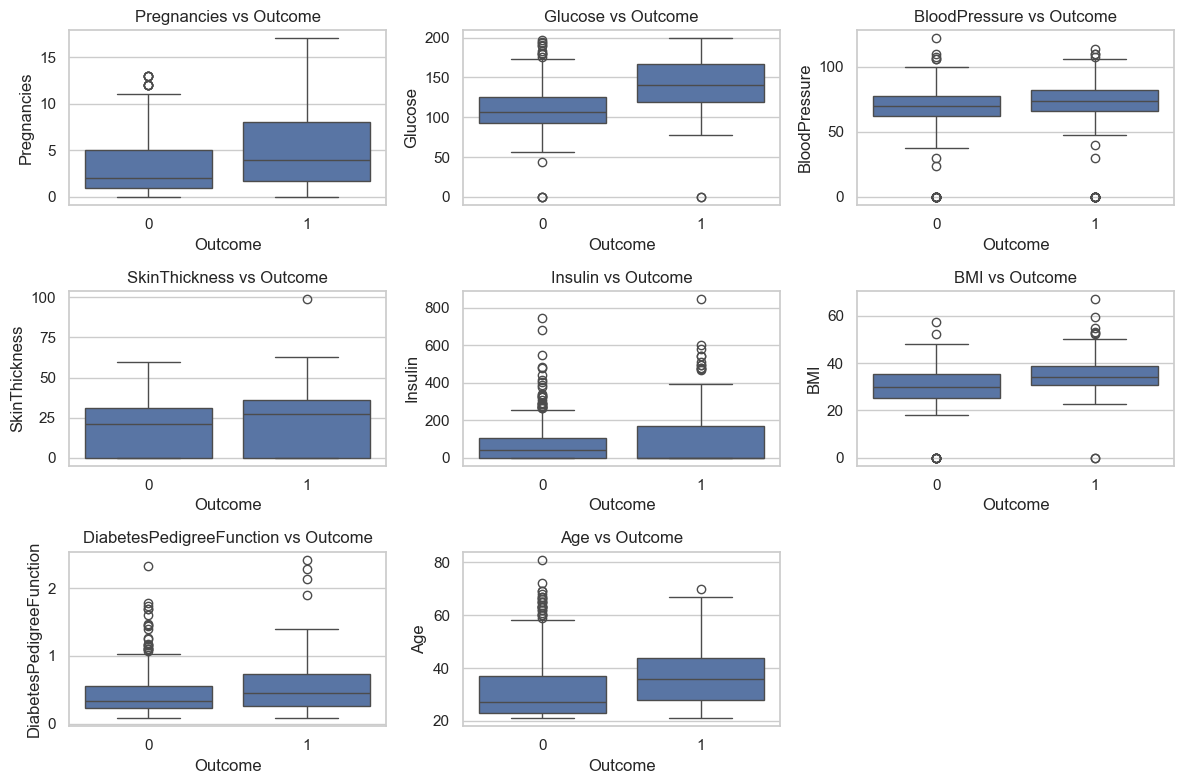

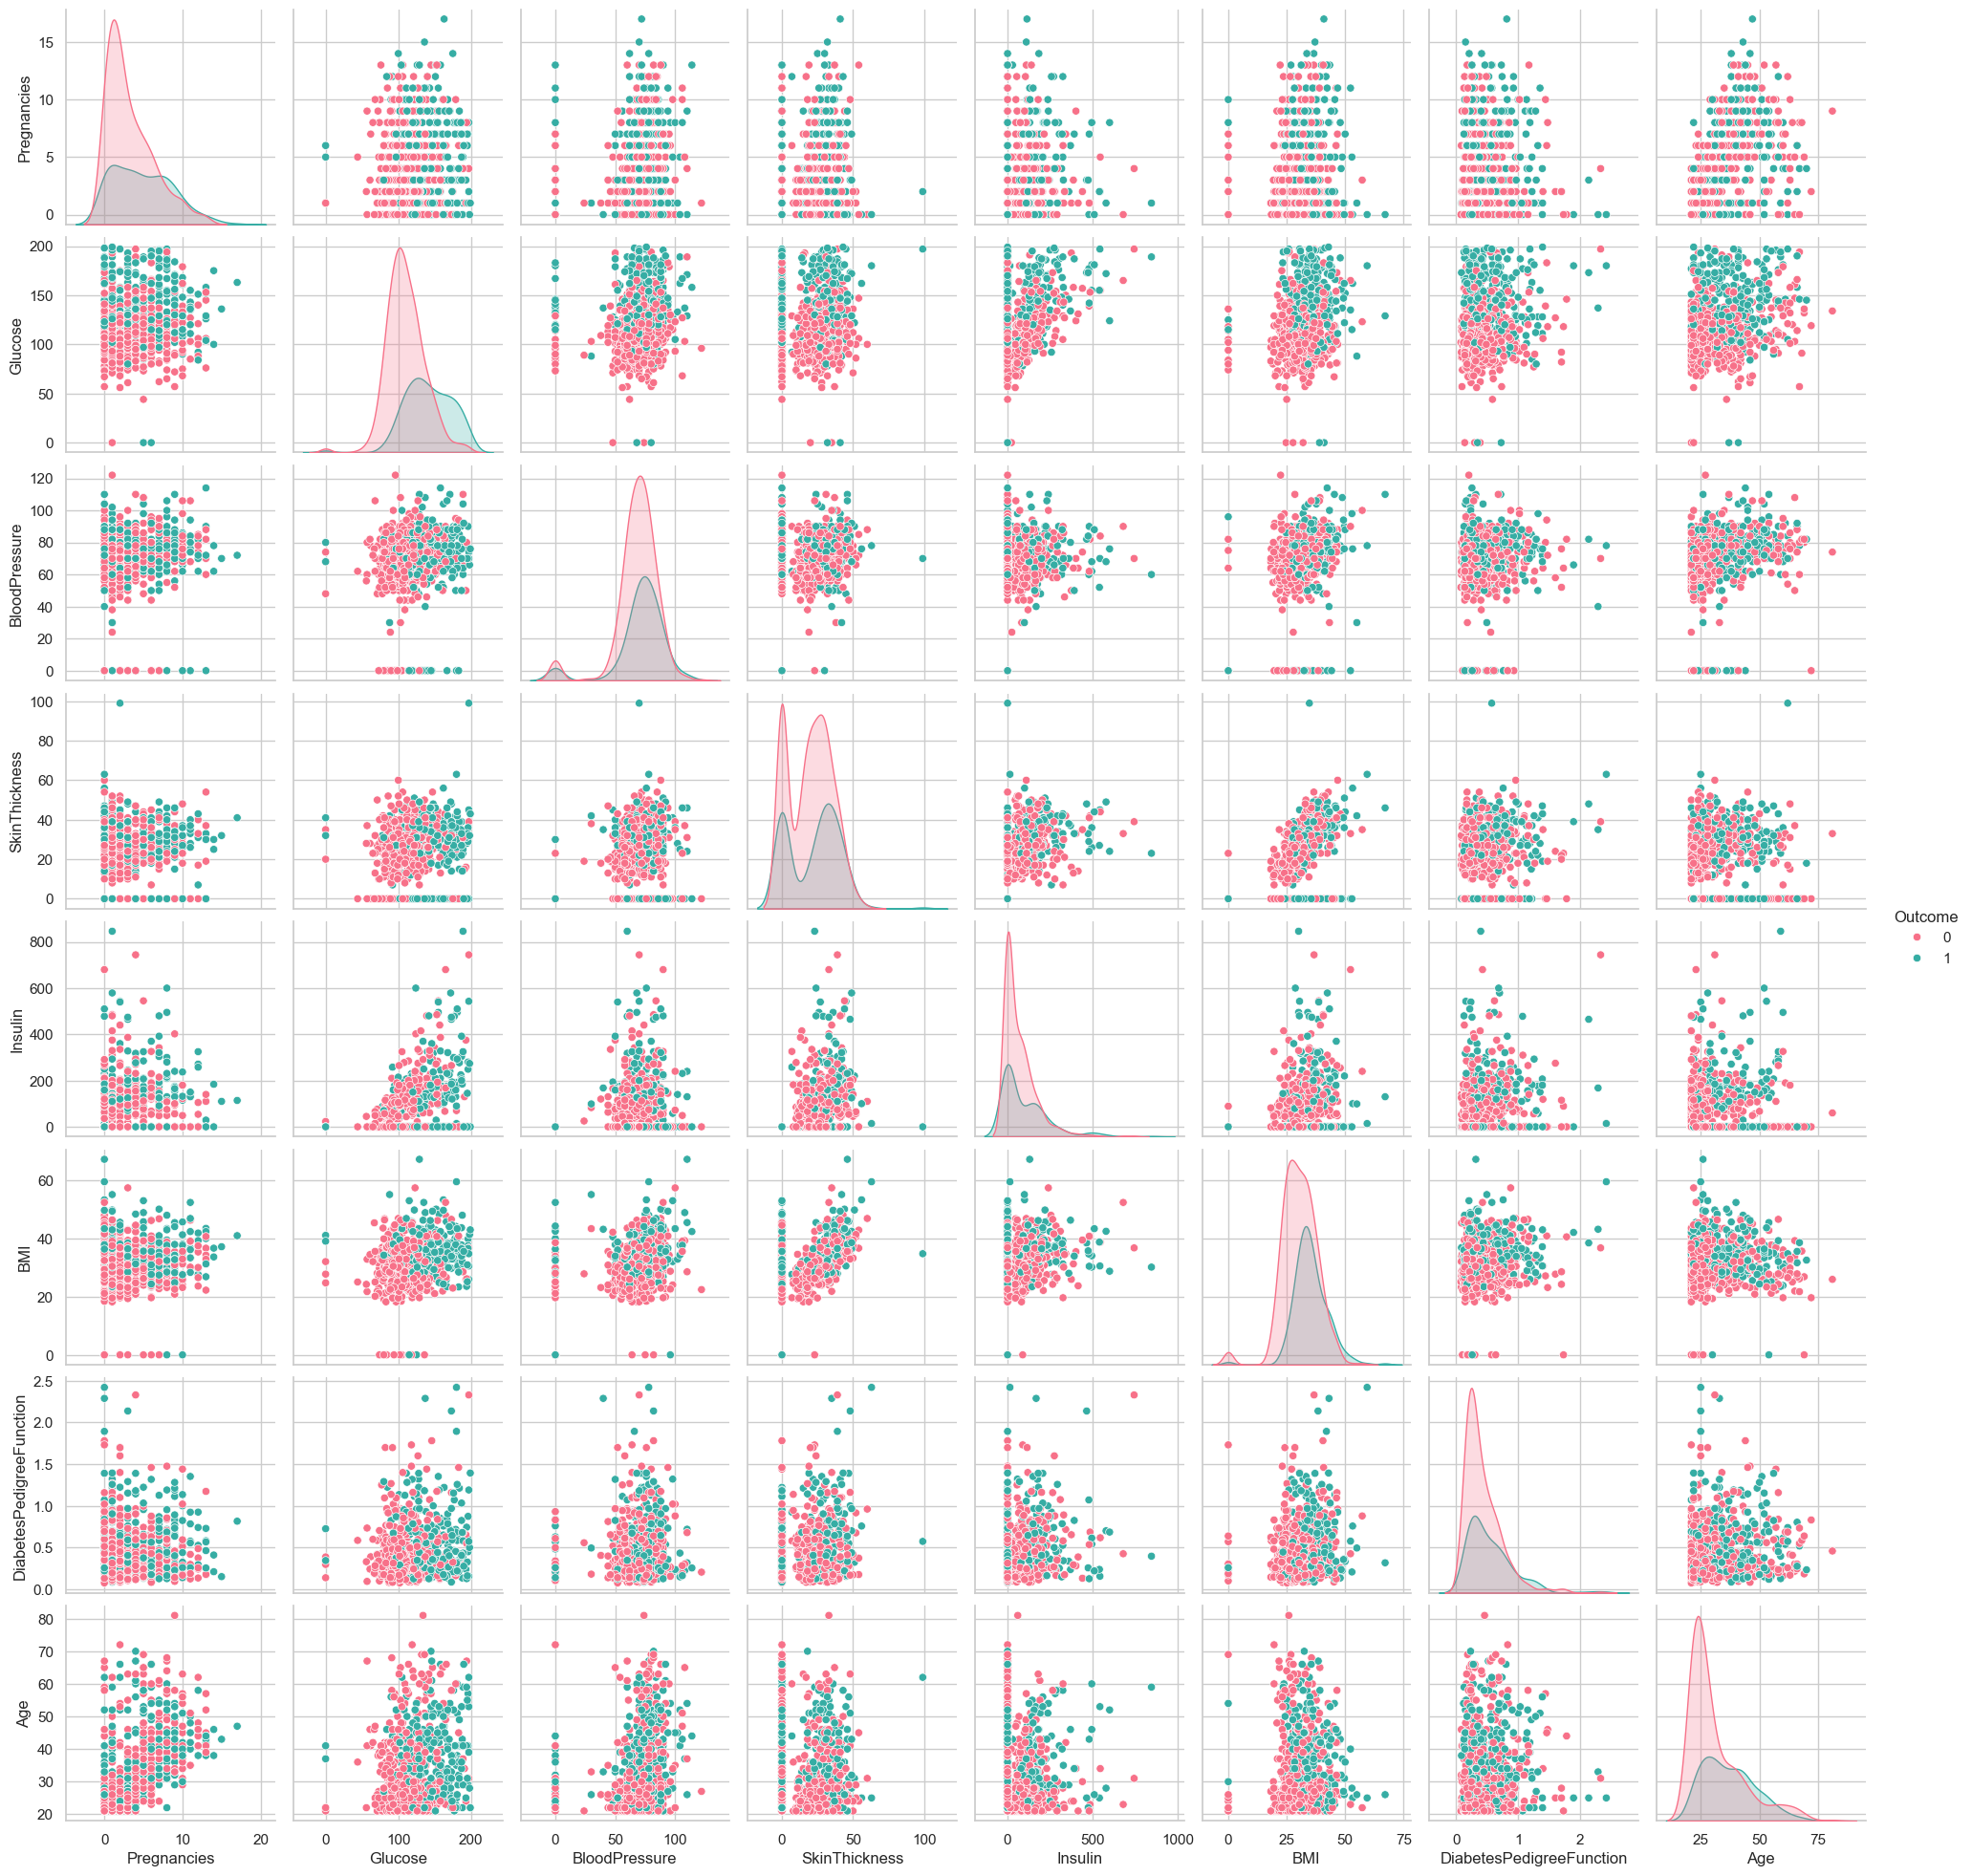

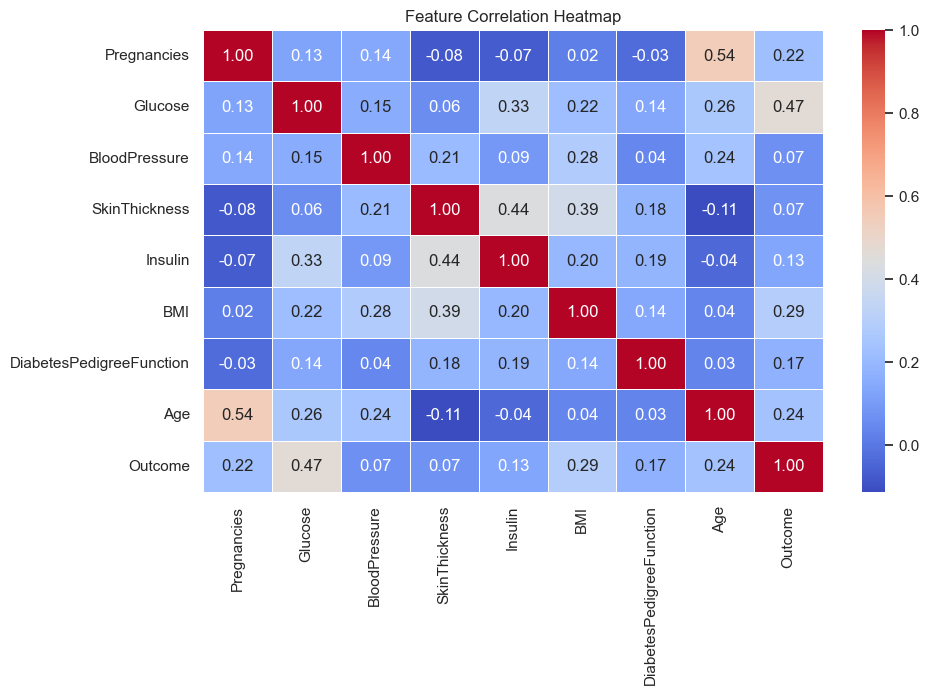

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Define target variable
target = "Outcome"

# 1. Histograms for all features
diabetes_dataset.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 2. Box plots to compare numerical features against Outcome
plt.figure(figsize=(12, 8))
for i, col in enumerate(diabetes_dataset.columns[:-1], 1):  # Exclude target column
    plt.subplot(3, 3, i)
    sns.boxplot(x=diabetes_dataset[target], y=diabetes_dataset[col])
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

# 3. Pairplot (scatter plots & histograms)
sns.pairplot(diabetes_dataset, hue=target, diag_kind="kde", palette="husl")
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [52]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [53]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Data Standardization

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X)

StandardScaler()

In [56]:
standardized_data = scaler.transform(X)

In [57]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [58]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [59]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


# Training the Model

In [61]:
classifier = svm.SVC(kernel='linear')

In [62]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Accuracy Score

In [63]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [64]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [65]:
input_data = (2,	122,	76,	27,	200,	35.9,	0.483,	26	)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54791859  0.03459802  0.35643175  0.40544544  1.04368861  0.49592704
   0.03359489 -0.61611067]]
[0]
The person is not diabetic


c:\Users\saikat roy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Exporting Model

In [66]:
import pickle

In [67]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [68]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [69]:
input_data = (2,	122,	76,	27,	200,	35.9,	0.483,	26	)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [70]:
input_data = (2,	122,	76,	27,	200,	35.9,	0.483,	26	)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


prediction = loaded_model.predict(std_data)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[  2.    122.     76.     27.    200.     35.9     0.483  26.   ]
[[  2.    122.     76.     27.    200.     35.9     0.483  26.   ]]
[[-0.54791859  0.03459802  0.35643175  0.40544544  1.04368861  0.49592704
   0.03359489 -0.61611067]]
The person is not diabetic


c:\Users\saikat roy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
